<a href="https://colab.research.google.com/github/Poojakamble24/Deep_Learning/blob/main/Regression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Regression With Keras**

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# step 1: Read the data

In [3]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv")
df.head(5)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


##**step**:2 Perform  your Basic Quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
df.duplicated().sum()

41

In [8]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [9]:
df =df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


### seperate X and Y (PE)

In [10]:
X = df.drop(columns='PE')
Y = df[['PE']]

In [11]:
X.head(5)

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Process X using pipeline

In [13]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                                 ('scale',StandardScaler())]).set_output(transform='pandas')

In [16]:
X_pre = num_pipe.fit_transform(X)

In [17]:
X_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9563,-0.609648,-0.423583,-0.241925,-0.027724
9564,1.847362,1.864831,-0.494441,-0.932100
9565,-0.492776,-0.863450,0.162101,0.364561
9566,-0.269777,0.439598,0.899448,1.459261


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [19]:
X_train

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499
...,...,...,...,...
5742,-0.109917,-1.064465,-1.356363,1.309330
5197,1.477937,1.535325,-1.701468,0.325538
5396,0.017702,-0.244640,-0.752007,1.464053
860,0.949996,1.146696,-0.418686,-0.445339


In [20]:
Y_train

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71
...,...
5742,459.96
5197,430.00
5396,447.96
860,440.45


In [21]:
X_test

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599
...,...,...,...,...
3403,-2.138395,-1.505909,0.899448,1.746114
4214,0.240700,1.233408,-0.460772,0.604861
7085,0.962086,1.638591,-1.230104,-0.857477
2215,1.433606,1.266517,-1.097113,-0.207093


In [22]:
X_train.shape

(7621, 4)

In [23]:
X_train

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499
...,...,...,...,...
5742,-0.109917,-1.064465,-1.356363,1.309330
5197,1.477937,1.535325,-1.701468,0.325538
5396,0.017702,-0.244640,-0.752007,1.464053
860,0.949996,1.146696,-0.418686,-0.445339


In [24]:
X_test.shape

(1906, 4)

###Steps: Build the neural network
**bold text**

In [25]:
from keras. models import Sequential
from keras.layers import Dense,Input

In [26]:
from operator import add
#Initialize the model
Model = Sequential()

#Add input Layer
Model.add(Input(shape=(X_train.shape[1],)))
#Add dense hidden layer 1
Model .add(Dense(16,activation='relu'))
#Add dense hidden layer 2
Model .add(Dense(8,activation='relu'))

# Add output layer
Model .add(Dense(1,activation='linear'))




In [27]:
# Compile the Model
Model. compile(loss="mse", metrics=["mae"], optimizer="adam")

In [28]:
 hist=Model.fit(X_train,Y_train,
          validation_data=(X_test, Y_test),

          epochs=60)

Epoch 1/60
239/239 [==============================] - 2s 5ms/step - loss: 202811.0312 - mae: 450.0175 - val_loss: 193851.9375 - val_mae: 440.0209
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 163738.8594 - mae: 403.1995 - val_loss: 121268.2578 - val_mae: 345.9683
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 77875.9453 - mae: 264.5401 - val_loss: 42880.7266 - val_mae: 184.8224
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 28960.8516 - mae: 146.3533 - val_loss: 19557.0742 - val_mae: 118.5020
Epoch 5/60
239/239 [==============================] - 1s 3ms/step - loss: 16027.6748 - mae: 106.6799 - val_loss: 12556.1934 - val_mae: 93.8523
Epoch 6/60
239/239 [==============================] - 1s 2ms/step - loss: 10609.9619 - mae: 85.8910 - val_loss: 8145.2944 - val_mae: 74.6928
Epoch 7/60
239/239 [==============================] - 1s 2ms/step - loss: 6721.7949 - mae: 67.5531 - val_loss: 4978.2944 - val_mae: 57.8

In [29]:
hist.history['loss']

[202811.03125,
 163738.859375,
 77875.9453125,
 28960.8515625,
 16027.6748046875,
 10609.9619140625,
 6721.794921875,
 4073.61962890625,
 2481.498779296875,
 1543.3155517578125,
 977.5894775390625,
 633.6929931640625,
 418.3700256347656,
 280.1837158203125,
 192.32472229003906,
 135.70948791503906,
 101.1367416381836,
 79.64896392822266,
 65.77251434326172,
 55.76554489135742,
 48.625736236572266,
 43.114253997802734,
 38.65193176269531,
 35.03434753417969,
 32.12287902832031,
 29.710845947265625,
 27.763574600219727,
 26.342607498168945,
 25.002582550048828,
 23.95220375061035,
 23.216482162475586,
 22.6453857421875,
 22.045372009277344,
 21.561229705810547,
 21.29686737060547,
 20.803735733032227,
 20.573652267456055,
 20.473356246948242,
 20.390457153320312,
 20.301963806152344,
 20.2543888092041,
 20.22903823852539,
 20.134626388549805,
 19.896408081054688,
 19.882003784179688,
 19.96683120727539,
 19.89357566833496,
 19.767868041992188,
 19.902225494384766,
 19.904150009155273,
 1

In [30]:
hist.history['val_loss']

[193851.9375,
 121268.2578125,
 42880.7265625,
 19557.07421875,
 12556.193359375,
 8145.29443359375,
 4978.29443359375,
 2995.985107421875,
 1833.6810302734375,
 1147.0972900390625,
 728.5293579101562,
 478.82183837890625,
 319.84173583984375,
 216.98597717285156,
 151.8136444091797,
 110.68331909179688,
 85.54249572753906,
 70.41790771484375,
 58.73191833496094,
 51.0147590637207,
 45.3346061706543,
 40.813961029052734,
 37.32724380493164,
 34.113197326660156,
 31.531810760498047,
 29.724376678466797,
 27.837114334106445,
 26.18785285949707,
 25.246213912963867,
 24.306743621826172,
 23.526172637939453,
 22.829763412475586,
 22.31454086303711,
 22.234344482421875,
 21.21388816833496,
 21.406368255615234,
 20.66566276550293,
 20.325820922851562,
 21.254058837890625,
 20.32886505126953,
 20.302560806274414,
 20.154165267944336,
 19.716197967529297,
 21.405241012573242,
 19.62052345275879,
 19.490375518798828,
 19.702308654785156,
 19.574193954467773,
 20.23841667175293,
 19.552051544189

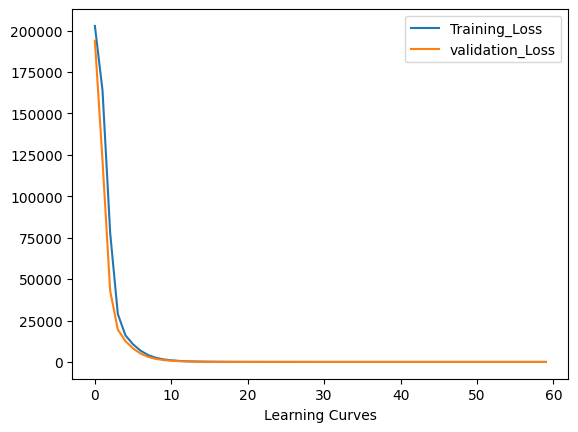

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="Training_Loss")
plt.plot(hist.history["val_loss"],label="validation_Loss")
plt.xlabel("Number of Epochas")
plt.xlabel("Mean Squared Error")
plt.xlabel("Learning Curves")
plt.legend()
plt.show()

In [33]:
Model.evaluate (X_train,Y_train)

239/239 [==============================] - 1s 4ms/step - loss: 19.6882 - mae: 3.5231


[19.68821144104004, 3.5230581760406494]

In [34]:
Model.evaluate (X_test,Y_test)

60/60 [==============================] - 0s 4ms/step - loss: 19.8817 - mae: 3.5535


[19.881736755371094, 3.5534653663635254]

In [35]:
Y_pred_train=Model.predict(X_train)
Y_pred_test=Model.predict(X_test)

60/60 [==============================] - 0s 1ms/step


In [36]:
Y_pred_train


array([[450.87445],
       [477.28897],
       [467.68604],
       ...,
       [450.67105],
       [437.3804 ],
       [453.373  ]], dtype=float32)

In [37]:
Y_train

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71
...,...
5742,459.96
5197,430.00
5396,447.96
860,440.45


In [49]:
from  sklearn.metrics import r2_score
r2_score(Y_train,Y_pred_train)

0.9315013764876537

In [50]:
r2_score(Y_test,Y_pred_test)

0.9341205803318765

In [53]:
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
X2= pd.read_csv(url)
X2

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97
...,...,...,...,...
95,26.35,69.48,1008.45,70.47
96,11.78,39.96,1011.37,82.95
97,5.62,41.38,1020.91,86.21
98,24.96,74.99,1008.25,80.52


In [54]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [65]:
X2_pre=num_pipe.fit_transform(X2)
X2_pre.head()

,AT,V,AP,RH
0,0.427011,0.406243,-0.567574,0.798624
1,1.326264,0.087032,-0.974534,-2.089095
2,1.186943,1.575060,-1.899298,0.850257
3,0.877341,0.685654,-0.306296,-0.032746
4,-1.026710,-1.056606,1.975528,-0.265470


In [66]:
preds = Model.predict(X2_pre)
preds[0:5]

4/4 [==============================] - 0s 2ms/step


array([[444.3195 ],
       [439.09705],
       [432.51868],
       [439.07068],
       [474.02182]], dtype=float32)

In [68]:
X2["powerOutput_pred"]=preds

In [69]:
X2

,AT,V,AP,RH,powerOutput_pred
0,22.49,58.82,1009.73,85.19,444.319489
1,28.88,54.89,1007.16,46.60,439.097046
2,27.89,73.21,1001.32,85.88,432.518677
3,25.69,62.26,1011.38,74.08,439.070679
4,12.16,40.81,1025.79,70.97,474.021820
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.119446
96,11.78,39.96,1011.37,82.95,471.508759
97,5.62,41.38,1020.91,86.21,483.832306
98,24.96,74.99,1008.25,80.52,436.817261


<Axes: xlabel='powerOutput_pred', ylabel='Count'>

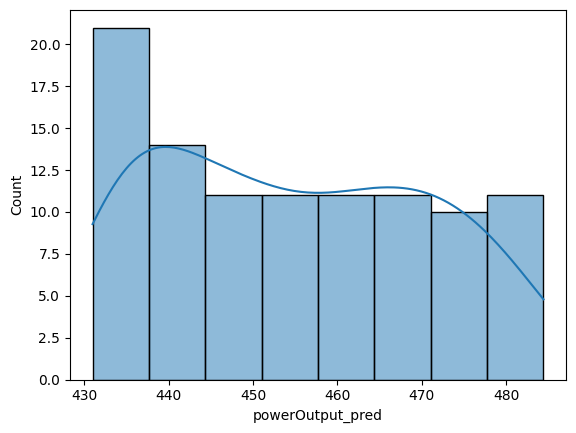

In [73]:
import seaborn as sns
sns.histplot(data=X2, x="powerOutput_pred",kde=True)



In [74]:
X2.to_csv("Result_csv",index=False)